In [1]:
import numpy as np
import xarray as xr

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.transforms import ScaledTranslation

import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature

import cmocean

In [2]:
def setup_axes(ax):
    ax.add_feature(cfeature.LAND, facecolor='lightgrey', zorder=2)
    ax.coastlines(resolution='110m', color='black', lw=2)
    ax.set_ylabel('latitude')
    ax.set_xlabel('longitude')


def label_ax(ax, label, position='top', fontsize=16):
    if position == 'inside':
        ax.annotate(
            label,
            xy=(0, 1), xycoords='axes fraction',
            xytext=(+0.5, -0.5), textcoords='offset fontsize',
            fontsize=fontsize, verticalalignment='top', fontfamily='serif',
            bbox=dict(facecolor='1.', edgecolor='k', pad=3.0))
    elif position == 'top':
        ax.text(
            0.0, 1.0, label, transform=(
                ax.transAxes + ScaledTranslation(7/72, +3/72, fig.dpi_scale_trans)),
            fontsize=fontsize, va='bottom', fontfamily='sans-serif')

In [3]:
data_fold = '../final_data'
fig2abcd_data = xr.open_dataarray(f'{data_fold}/fig_2abcd.nc')
fig2e_data = xr.open_dataarray(f'{data_fold}/fig_2e.nc')
fig2f_data = xr.open_dataarray(f'{data_fold}/fig_2f.nc')

In [4]:
mask = xr.where(~np.isnan(fig2abcd_data.isel(lead=0)), 1, np.nan).drop_vars(['lead'])

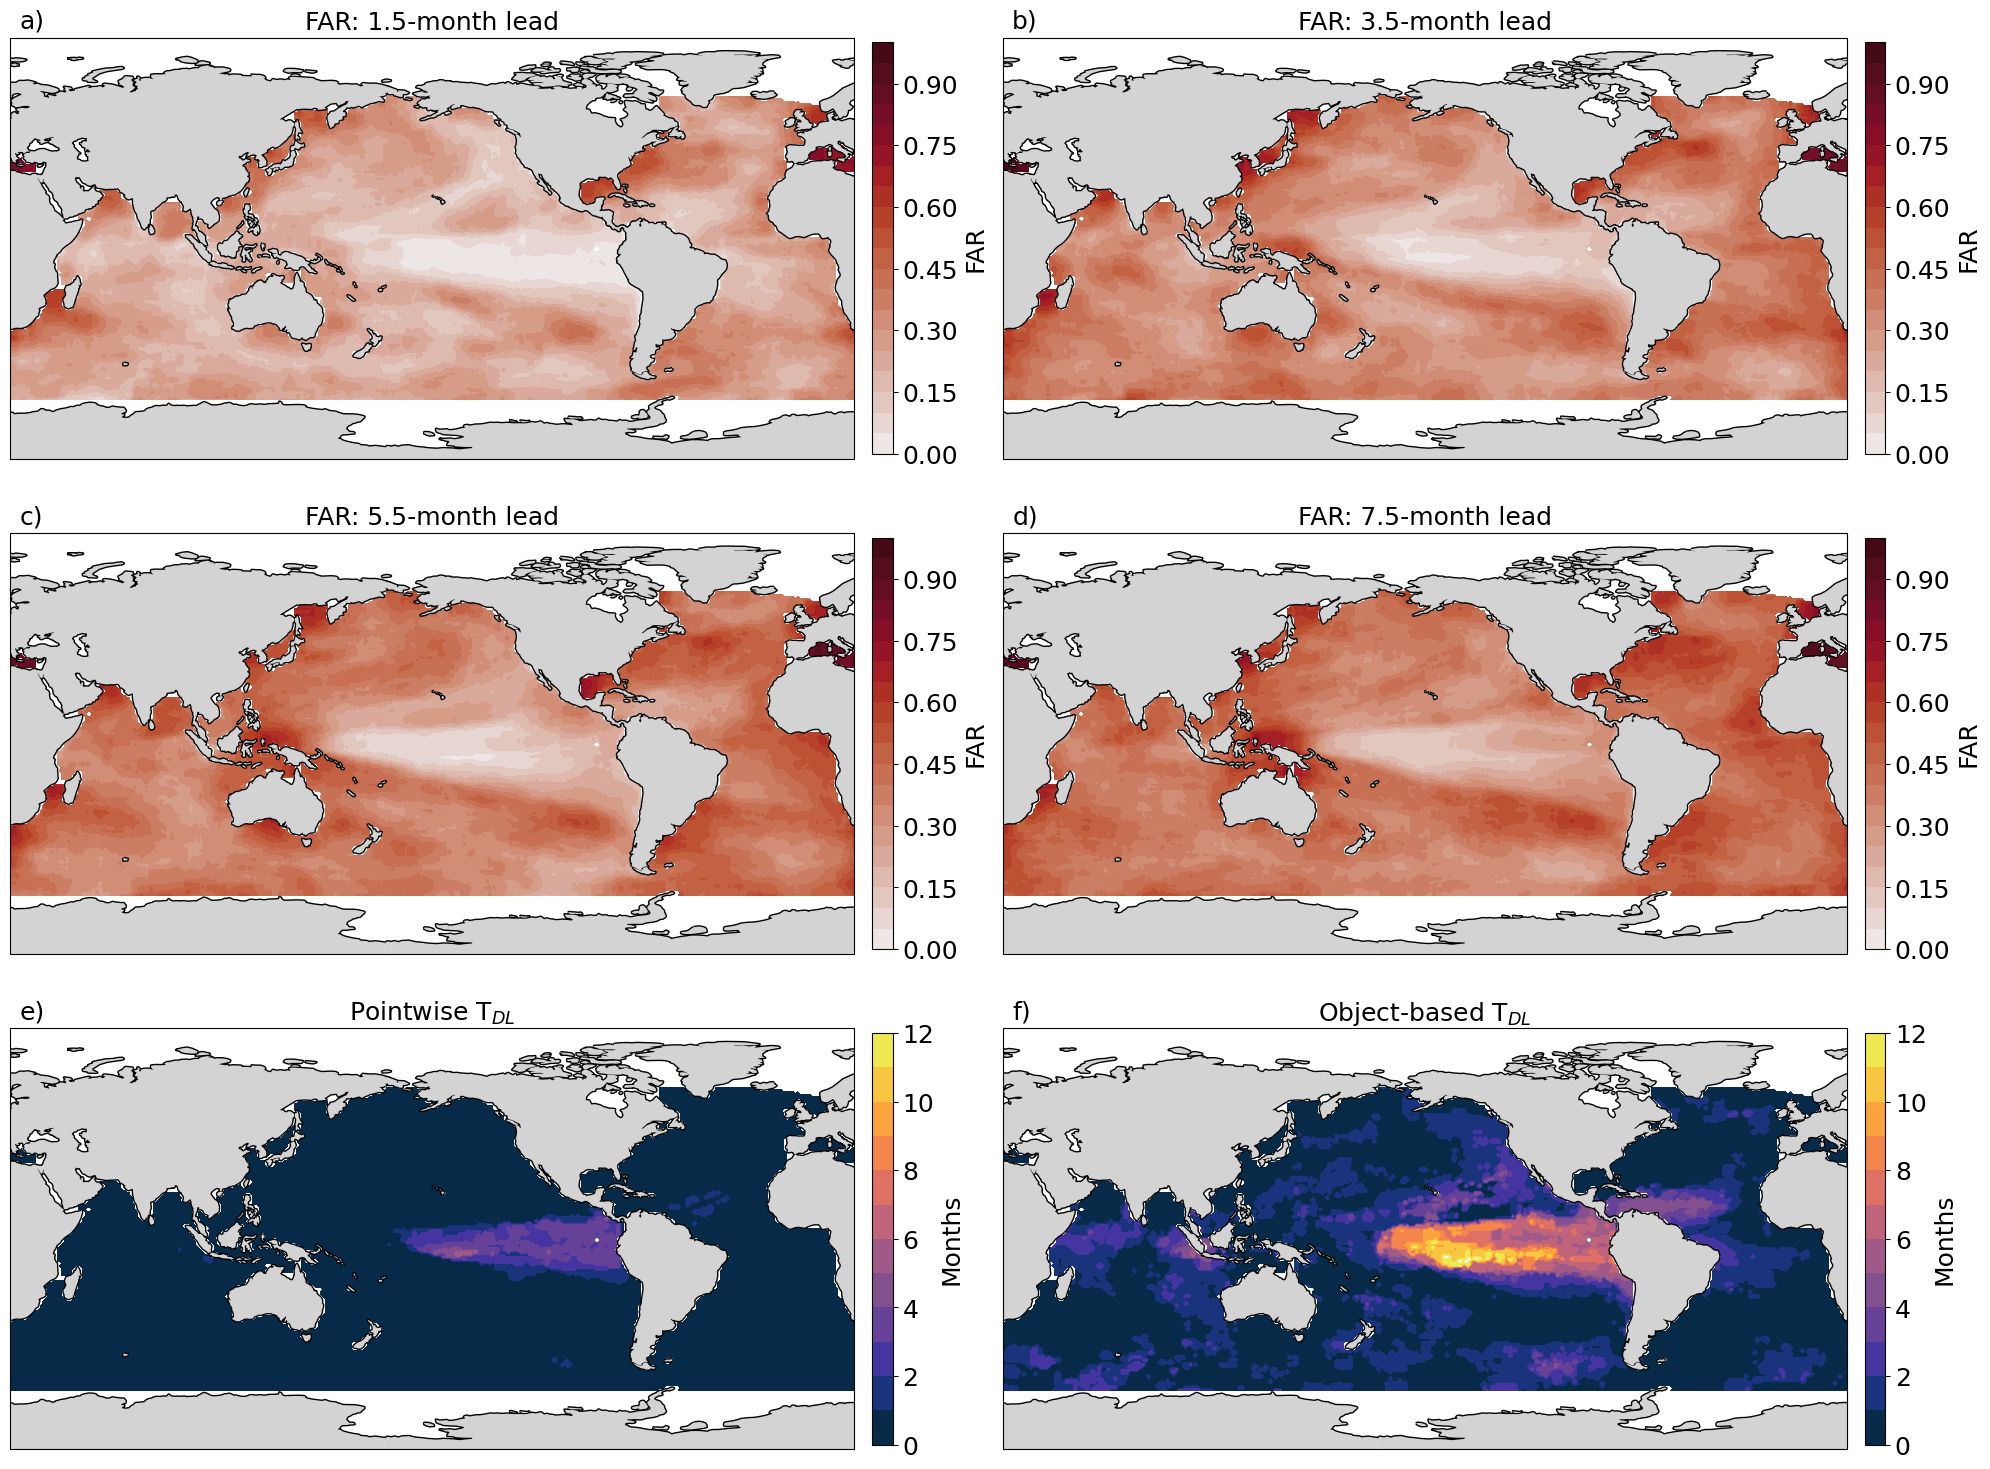

In [5]:
label_pos = 'top'
labelsize = 18
cbarsize = 18
leads = [1, 3, 5, 7]
data = [
    fig2abcd_data.sel(lead=leads[0]),
    fig2abcd_data.sel(lead=leads[1]),
    fig2abcd_data.sel(lead=leads[2]),
    fig2abcd_data.sel(lead=leads[3]),
    fig2e_data,
    fig2f_data
]
labels = ['a)', 'b)', 'c)', 'd)', 'e)', 'f)']
titles = [
    f'FAR: {leads[0]}.5-month lead',
    f'FAR: {leads[1]}.5-month lead',
    f'FAR: {leads[2]}.5-month lead',
    f'FAR: {leads[3]}.5-month lead',
    r'Pointwise T$_{DL}$',
    r'Object-based T$_{DL}$'
]

fig, axs = plt.subplots(3, 2, figsize=(20, 15), subplot_kw={'projection': ccrs.PlateCarree(200)})
for i, ax in enumerate(axs.flatten()):
    setup_axes(ax)
    if i in list(range(4)):
        im = ax.contourf(data[i].lon, data[i].lat, data[i], transform=ccrs.PlateCarree(), cmap=cmocean.cm.amp, levels=np.linspace(0, 1, 21))
        cbar = plt.colorbar(im, ax=ax, fraction=0.0233, pad=0.02)
        cbar.set_label(label='FAR', size=cbarsize)
        cbar.ax.tick_params(labelsize=cbarsize)
        label_ax(ax, labels[i], label_pos, fontsize=labelsize)
    elif i in [4, 5]:
        im = ax.contourf(data[i].lon, data[i].lat, data[i]*mask, transform=ccrs.PlateCarree(), cmap=cmocean.cm.thermal, levels=np.arange(13))
        cbar = plt.colorbar(im, ax=ax, fraction=0.0233, pad=0.02)
        cbar.set_label(label=r'Months', size=cbarsize)
        cbar.ax.tick_params(labelsize=cbarsize)
        label_ax(ax, labels[i], label_pos, fontsize=labelsize)
    ax.set_title(titles[i], fontsize=labelsize)

plt.tight_layout()
plt.show()